In [3]:
import pandas as pd
from geopy.geocoders import Nominatim


In [9]:
df_train = pd.read_csv('/Users/tinaschendt/downloads/train.csv')

In [10]:
df_test = pd.read_csv('/Users/tinaschendt/downloads/test.csv')

In [2]:
df_spray = pd.read_csv('/Users/tinaschendt/downloads/spray.csv')

In [12]:
df_weather = pd.read_csv('/Users/tinaschendt/downloads/weather.csv')

In [13]:
#Training data Column Na
# train.csv, test.csv - the training and test set of the main dataset. T
#The training set consists of data from 2007, 2009, 2011, and 2013, 
#while in the test set you are requested to predict the test results for 2008, 2010, 2012, 
#and 2014.
# Id: the id of the record
# Date: date that the WNV test is performed
# Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
# Species: the species of mosquitos
# Block: block number of address
# Street: street name
# Trap: Id of the trap
# AddressNumberAndStreet: approximate address returned from GeoCoder
# Latitude, Longitude: Latitude and Longitude returned from GeoCoder
# AddressAccuracy: accuracy returned from GeoCoder
# NumMosquitos: number of mosquitoes caught in this trap
# WnvPresent: whether West Nile Virus was present in these mosquitos. 
#1 means WNV is present, and 0 means not present. 


In [9]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [10]:
df_train.Trap.value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
T054     163
T128     160
T151     156
T212     152
T090     151
T114     148
T158     147
T048     146
T031     146
T903     140
T008     139
T011     133
T209     130
T200     129
T073     128
T030     126
T003     122
T094     121
T028     117
T066     116
T074     115
T047     114
T221     112
T102     112
T159     111
        ... 
T141      22
T162      21
T219      21
T156      21
T154      21
T206      21
T075      20
T070      20
T071      19
T142      18
T034      17
T097      17
T050      17
T044      15
T051      15
T060      15
T001      15
T149      14
T005      14
T157      14
T072      13
T004      12
T054C      9
T078       8
T229       8
T238       7
T076       5
T094B      5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

In [8]:
y = df_train.WnvPresent

In [9]:
y.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [10]:
#baseline accuracy
y.value_counts() / len(y)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [11]:
df_train['Date'] = pd.to_datetime(df_train.Date)

In [14]:
df_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [27]:
df_train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [13]:
df_train.groupby(['Species', 'WnvPresent']).count()


Date  Address  Block  Street  Trap  \
Species                WnvPresent                                       
CULEX ERRATICUS        0              1        1      1       1     1   
CULEX PIPIENS          0           2459     2459   2459    2459  2459   
                       1            240      240    240     240   240   
CULEX PIPIENS/RESTUANS 0           4490     4490   4490    4490  4490   
                       1            262      262    262     262   262   
CULEX RESTUANS         0           2691     2691   2691    2691  2691   
                       1             49       49     49      49    49   
CULEX SALINARIUS       0             86       86     86      86    86   
CULEX TARSALIS         0              6        6      6       6     6   
CULEX TERRITANS        0            222      222    222     222   222   

                                   AddressNumberAndStreet  Latitude  \
Species                WnvPresent                                     
CULEX ERRATICUS        0                                1         1   
CULEX PIPIENS          0                             2459      2459   
                       1                              240       240   
CULEX PIPIENS/RESTUANS 0                             4490      4490   
                       1                              262       262   
CULEX RESTUANS         0                             2691      2691   
                       1                               49        49   
CULEX SALINARIUS       0                               86        86   
CULEX TARSALIS         0                                6         6   
CULEX TERRITANS        0                              222       222   

                                   Longitude  AddressAccuracy  NumMosquitos  
Species                WnvPresent                                            
CULEX ERRATICUS        0                   1                1             1  
CULEX PIPIENS          0                2459             2459          2459  
                       1                 240              240           240  
CULEX PIPIENS/RESTUANS 0                4490             4490          4490  
                       1                 262              262           262  
CULEX RESTUANS         0                2691             2691          2691  
                       1                  49               49            49  
CULEX SALINARIUS       0                  86               86            86  
CULEX TARSALIS         0                   6                6             6  
CULEX TERRITANS        0                 222              222           222

In [15]:
#df_train.groupby(['Trap', 'WnvPresent', 'Block']).count()

df_test.head()

In [3]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [17]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [18]:
df_weather.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [19]:
df_train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [20]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(df_train)

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
#print "Missing values per column:"
#print data.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column


missing values 
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=10506, step=1)
dataframe types 
Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object
dataframe shape 
(10506, 12)
dataframe describe 
      

In [21]:
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month

In [22]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5


In [23]:
df_2007 = df_train[df_train.year == 2007]

In [25]:
df_2007.year.unique()

array([2007])

In [26]:
df_2009 = df_train[df_train.year == 2009]

In [28]:
df_2011 = df_train[df_train.year == 2011]

In [29]:
df_2013 = df_train[df_train.year == 2013]

In [32]:
df_2007[df_2007.WnvPresent == 1].count()

Date                      236
Address                   236
Species                   236
Block                     236
Street                    236
Trap                      236
AddressNumberAndStreet    236
Latitude                  236
Longitude                 236
AddressAccuracy           236
NumMosquitos              236
WnvPresent                236
year                      236
month                     236
dtype: int64

In [33]:
df_2009[df_2009.WnvPresent == 1].count()

Date                      19
Address                   19
Species                   19
Block                     19
Street                    19
Trap                      19
AddressNumberAndStreet    19
Latitude                  19
Longitude                 19
AddressAccuracy           19
NumMosquitos              19
WnvPresent                19
year                      19
month                     19
dtype: int64

In [34]:
df_2011[df_2011.WnvPresent == 1].count()

Date                      57
Address                   57
Species                   57
Block                     57
Street                    57
Trap                      57
AddressNumberAndStreet    57
Latitude                  57
Longitude                 57
AddressAccuracy           57
NumMosquitos              57
WnvPresent                57
year                      57
month                     57
dtype: int64

In [36]:
df_2013[df_2013.WnvPresent == 1].count()

Date                      239
Address                   239
Species                   239
Block                     239
Street                    239
Trap                      239
AddressNumberAndStreet    239
Latitude                  239
Longitude                 239
AddressAccuracy           239
NumMosquitos              239
WnvPresent                239
year                      239
month                     239
dtype: int64

In [45]:
df_2007.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,20
11,15
12,36
13,4
14,2
15,3
17,2
18,0
20,1


In [46]:
df_2009.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,5
11,2
12,0
13,1
14,0
15,0
17,0
22,0
24,0


In [47]:
df_2011.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,27
11,1
12,1
13,1
14,0
17,1
22,0
24,0
25,0


In [48]:
df_2013.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,59
11,8
12,4
13,5
14,3
17,8
21,1
22,11
24,2


In [70]:
df_train.Block.unique()

array([41, 62, 79, 15, 25, 11, 21, 22, 17, 53, 65, 75, 89, 91, 36, 72, 38,
       49, 58, 50, 14, 10, 42, 40, 43, 28, 18, 70, 35, 93, 37, 45, 46, 60,
       61, 27, 68, 30, 96, 64, 12, 20, 33, 52, 67, 73, 39, 47, 55, 71, 77,
       63, 13, 81, 24, 80, 82, 98, 66, 48, 51, 90, 29, 34])

In [74]:
df_train['lat_long'] = list(zip(df_train.Latitude, df_train.Longitude))

In [11]:
df_location = df_train.loc[:, ['Trap', 'Latitude', 'Longitude']]

In [12]:
df_location.head()

,Trap,Latitude,Longitude
0,T002,41.954690,-87.800991
1,T002,41.954690,-87.800991
2,T007,41.994991,-87.769279
3,T015,41.974089,-87.824812
4,T015,41.974089,-87.824812


In [13]:
df_location['Trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [17]:
Trap = df_location.groupby(['Trap'])

In [20]:
Trap.head()

,Trap,Latitude,Longitude
0,T002,41.954690,-87.800991
1,T002,41.954690,-87.800991
2,T007,41.994991,-87.769279
3,T015,41.974089,-87.824812
4,T015,41.974089,-87.824812
5,T045,41.921600,-87.666455
6,T046,41.891118,-87.654491
7,T048,41.867108,-87.654224
8,T048,41.867108,-87.654224
9,T049,41.896282,-87.655232


In [75]:
# import gmplot

# gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

# gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
# gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
# gmap.heatmap(heat_lats, heat_lngs)

# gmap.draw("mymap.html")

In [3]:
df_spray['Geo'] = df_spray['Latitude'].map(str) + ', ' + df_spray["Longitude"].map(str)

In [5]:
geolocator = Nominatim()

In [7]:
results = geolocator.reverse('42.3916233333, -88.0891633333')


In [8]:
results.address

u'Ridgewood Lane, Lake Villa, Lake County, Illinois, 60073, United States of America'

In [5]:
all_data = pd.read_csv('/Users/natalie/Desktop/GA/Project-4/WestNileProject/all_data.csv')

In [6]:
all_data.head()

,Address,AddressAccuracy,AddressNumberAndStreet,AvgSpeed,Block,CodeSum,Cool,Date,Depart,Depth,...,Water1,WetBulb,WnvPresent,day,id,month,newdate,spray,trap,year
0,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",NaN,41.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",NaN,41.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
2,"6200 North Mandell Avenue, Chicago, IL 60646, USA",9.0,"6200 N MANDELL AVE, Chicago, IL",NaN,62.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
3,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",NaN,79.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
4,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",NaN,79.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0


In [3]:
df = pd.read_csv('/Users/natalie/Downloads/Modeldf2.csv')

In [4]:
df.head()

,WnvPresent,NumMosquitos,Last7Average_Windspeed,Last7Average_Temp,Last7Total_Rainfall,month,T002,T003,T004,T005,...,T237,T238,T900,T903,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0,1,0.76,68.285714,9.821429,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0.76,68.285714,9.821429,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,4,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from bs4 import BeautifulSoup
import pandas as pd
# import requests
import xgboost
import re


In [18]:
y = df['WnvPresent']
dfX = df.drop('WnvPresent', 1)


In [20]:
X = dfX
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

In [25]:
dt = RandomForestClassifier(n_estimators=1000, min_samples_split= 2, random_state= 42)
dt.fit(X,y)
s = cross_val_score(dt, X, y, cv=cv)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3))

Random Forest with Balanced Classes Score:	0.944 ± 0.0


In [24]:
importance_dataframe_big = pd.DataFrame(dt.feature_importances_, X.columns, columns=['importance']).sort_values('importance', ascending=False)
importance_dataframe_big.to_csv('States_for_Tabby.csv',index = False)
importance_dataframe_big.head(100)

,importance
NumMosquitos,0.256650
month,0.117038
Last7Average_Temp,0.088795
Last7Total_Rainfall,0.082137
Last7Average_Windspeed,0.074386
CULEX PIPIENS,0.020253
CULEX RESTUANS,0.018710
CULEX PIPIENS/RESTUANS,0.017791
T900,0.014282
T008,0.007943


In [43]:
import xgboost as xgb
from IPython.display import display
from matplotlib import pyplot


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


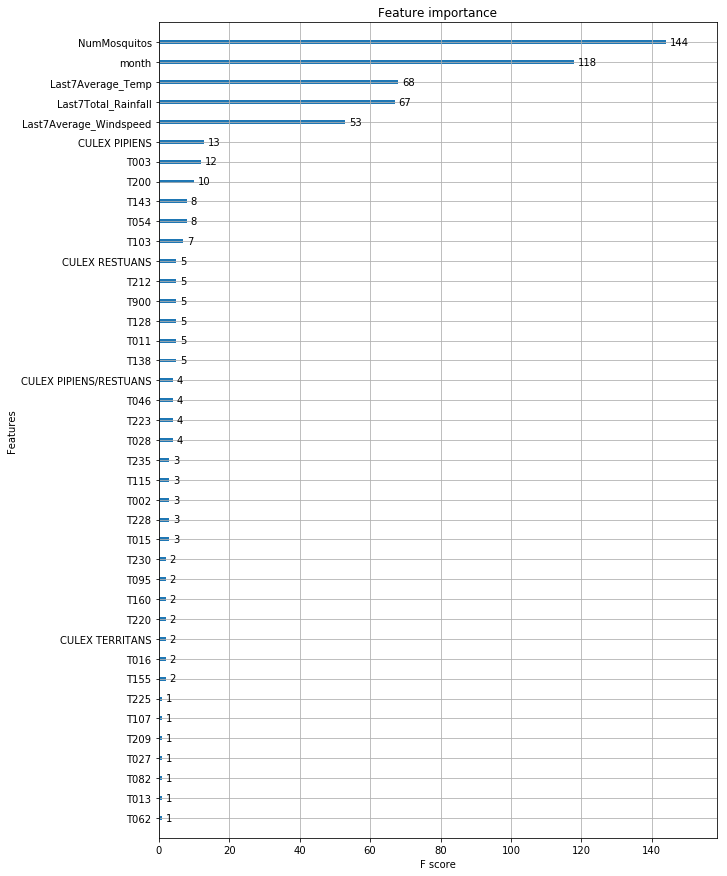

In [51]:
# fit model no training data
xgbc = xgb.XGBClassifier(seed= 42)
xgbc.fit(X, y)
# feature importance
#print(xgb.feature_importances_)

# plot feature importance
fig, ax = pyplot.subplots(figsize=(10, 15))
xgb.plot_importance(xgbc, ax=ax)
pyplot.show()

In [44]:
def calc_roc_auc(y, predict_probs):
    
    """
    Function accepts labels (matrix y) and predicted probabilities
    Function calculates fpr (false positive rate), tpr (true postivies rate), thresholds and auc (area under
    the roc curve)
    Function returns auc
    """
    fpr, tpr, thresholds = metrics.roc_curve(y, predict_probs)
    roc_auc = metrics.auc(fpr, tpr)
    
    return roc_auc

In [45]:
train_split, val_split, label_train_split, label_val_split = model_selection.train_test_split(X, 
                                      y, test_size = 0.33, random_state = 42, stratify= y)


In [48]:
def select_features_by_importance_threshold(model, X_train, y_train, selection_model, X_test, y_test,
                                           minimum = False):

    # Fit model using each importance as a threshold
    if minimum:
        thresholds= np.unique(model.feature_importances_[model.feature_importances_ > minimum])
        # include 0 for all features
        thresholds = np.insert(thresholds, 0, 0.)
    else:
        thresholds= np.unique(model.feature_importances_)
        
    
    print(thresholds)
    for thresh in thresholds:
# select features using threshold
        selection = feature_selection.SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
 # train model
        selection_model = selection_model
        selection_model.fit(select_X_train, y_train)
    # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict_proba(select_X_test)[:,1]
        predictions = y_pred
        #predictions = [round(value) for value in y_pred]
        auc = calc_roc_auc(y_test, predictions)
        print("Thresh=%.3f, n=%d, AUC: %.2f%%" % (thresh, select_X_train.shape[1], auc))


In [61]:
select_features_by_importance_threshold(xgbc, train_split, label_train_split, 
                                        xgb.XGBClassifier(seed= 42), val_split, label_val_split)

[ 0.          0.00169492  0.00338983  0.00508475  0.00677966  0.00847458
  0.01186441  0.01355932  0.01694915  0.02033898  0.0220339   0.08983051
  0.11355932  0.11525424  0.2         0.2440678 ]


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.000, n=146, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.002, n=40, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.003, n=33, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.005, n=26, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.007, n=21, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.008, n=17, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.012, n=11, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.014, n=10, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.017, n=8, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.020, n=7, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.022, n=6, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.090, n=5, AUC: 0.88%
Thresh=0.114, n=4, AUC: 0.88%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.115, n=3, AUC: 0.88%
Thresh=0.200, n=2, AUC: 0.86%


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


Thresh=0.244, n=1, AUC: 0.79%


In [63]:
select_features_by_importance_threshold(dt, train_split, label_train_split, 
                                        ensemble.RandomForestClassifier(random_state= 42), val_split, label_val_split)

[  2.48219331e-09   2.21108715e-06   4.34079446e-06   6.58841409e-06
   7.76254081e-06   7.82054005e-06   1.29031025e-05   1.32865536e-05
   1.46663257e-05   1.57613795e-05   1.87149120e-05   2.12240787e-05
   2.57946842e-05   3.04449863e-05   3.80756267e-05   3.85460511e-05
   3.94454695e-05   4.51044047e-05   5.39708093e-05   5.74725648e-05
   6.41903837e-05   6.98979009e-05   7.58354553e-05   7.90288997e-05
   8.13400328e-05   1.03673886e-04   1.07590005e-04   1.12468571e-04
   1.15927503e-04   1.18903106e-04   1.33421596e-04   1.41947313e-04
   2.02641780e-04   2.42578208e-04   2.78738308e-04   3.08021926e-04
   3.11946256e-04   3.24483246e-04   6.33719020e-04   6.35379349e-04
   8.34196153e-04   1.00139542e-03   1.04046226e-03   1.04875843e-03
   1.09967178e-03   1.10462437e-03   1.12454100e-03   1.13181071e-03
   1.16661834e-03   1.17253280e-03   1.19263777e-03   1.20025615e-03
   1.20833416e-03   1.22426846e-03   1.25835170e-03   1.32974323e-03
   1.46776108e-03   1.53815078e-03

In [3]:
import pandas as pd
df_train_new = pd.read_csv('df_train_new.csv')

In [4]:
df_test_new = pd.read_csv('df_test_new.csv')

In [5]:
df_train_new.columns

Index([u'Date', u'Species', u'Latitude', u'Longitude', u'WnvPresent', u'month',
       u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS', u'CULEX RESTUANS',
       u'CULEX SALINARIUS', u'CULEX TARSALIS', u'CULEX TERRITANS'],
      dtype='object')

In [6]:
df_test_new.columns

Index([u'Id', u'Date', u'Species', u'Latitude', u'Longitude', u'month',
       u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS', u'CULEX RESTUANS',
       u'CULEX SALINARIUS', u'CULEX TARSALIS', u'CULEX TERRITANS',
       u'UNSPECIFIED CULEX'],
      dtype='object')

In [13]:
df_train = pd.read_csv('df_train.csv')

In [14]:
df_train.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'year', u'month'],
      dtype='object')

In [19]:
df_train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [21]:
df_test = pd.read_csv('./assets/test.csv')

In [22]:
df_test.Species.value_counts()

CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
CULEX ERRATICUS           14345
UNSPECIFIED CULEX         14345
Name: Species, dtype: int64

In [23]:
Species_dummies = pd.get_dummies(df_train.Species)


In [24]:
Species_dummies.columns

Index([u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS'],
      dtype='object')

In [25]:
df_train_new.columns

Index([u'Date', u'Species', u'Latitude', u'Longitude', u'WnvPresent', u'month',
       u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS', u'CULEX RESTUANS',
       u'CULEX SALINARIUS', u'CULEX TARSALIS', u'CULEX TERRITANS'],
      dtype='object')

In [60]:
df_train_new.drop([u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS', u'CULEX RESTUANS',
       u'CULEX SALINARIUS', u'CULEX TARSALIS', u'CULEX TERRITANS'], axis=1, inplace=True)

In [63]:
df_train_new.columns

Index([u'Date', u'Species', u'Latitude', u'Longitude', u'WnvPresent', u'month',
       u'CULEX ERRATICUS', u'CULEX ERRATICUS', u'CULEX ERRATICUS'],
      dtype='object')

In [68]:
df_train_new.columns

Index([u'Date', u'Species', u'Latitude', u'Longitude', u'WnvPresent',
       u'month'],
      dtype='object')

In [69]:
df_train_new = pd.concat([df_train_new, Species_dummies], axis=1)


In [70]:
All_Weather2 = pd.read_csv('All_Weather2.csv')

In [72]:
df_train_new.columns

Index([u'Date', u'Species', u'Latitude', u'Longitude', u'WnvPresent', u'month',
       u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS'],
      dtype='object')

In [73]:
All_Weather2.columns

Index([u'Date', u'Last7Average_Temp', u'Last7Average_Windspeed',
       u'Last7Total_Rainfall', u'Last14Average_Temp',
       u'Last14Average_Windspeed', u'Last14Total_Rainfall',
       u'Last7Average_Daylight', u'Last14Average_Daylight',
       u'Last7Average_Departure', u'Last14Average_Departure'],
      dtype='object')

In [74]:
merged_train = df_train_new.merge(All_Weather2, left_on='Date', right_on ='Date', how= 'inner')

In [75]:
 def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(merged_train)


missing values 
Date                       0
Species                    0
Latitude                   0
Longitude                  0
WnvPresent                 0
month                      0
CULEX ERRATICUS            0
CULEX PIPIENS              0
CULEX PIPIENS/RESTUANS     0
CULEX RESTUANS             0
CULEX SALINARIUS           0
CULEX TARSALIS             0
CULEX TERRITANS            0
Last7Average_Temp          0
Last7Average_Windspeed     0
Last7Total_Rainfall        0
Last14Average_Temp         0
Last14Average_Windspeed    0
Last14Total_Rainfall       0
Last7Average_Daylight      0
Last14Average_Daylight     0
Last7Average_Departure     0
Last14Average_Departure    0
dtype: int64
dataframe index 
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10496, 10497, 10498, 10499, 10500, 10501, 10502, 10503, 10504,
            10505],
           dtype='int64', length=10506)
dataframe types 
Date                     

In [76]:
merged_train.to_csv('merged_train.csv')

In [77]:
Species_test_dummies = pd.get_dummies(df_test.Species)


In [78]:
Species_test_dummies.columns


Index([u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS', u'UNSPECIFIED CULEX'],
      dtype='object')

In [79]:
df_test_new.columns

Index([u'Id', u'Date', u'Species', u'Latitude', u'Longitude', u'month',
       u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS', u'UNSPECIFIED CULEX'],
      dtype='object')

In [80]:
df_test_new.drop([u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS', u'CULEX RESTUANS',
       u'CULEX SALINARIUS', u'CULEX TARSALIS', u'CULEX TERRITANS',
       u'UNSPECIFIED CULEX'], axis=1, inplace=True)

In [84]:
#df_test_new.drop([u'CULEX ERRATICUS'], axis=1, inplace=True)
df_test_new.columns

Index([u'Id', u'Date', u'Species', u'Latitude', u'Longitude', u'month'], dtype='object')

In [85]:
df_test_new = pd.concat([df_test_new, Species_test_dummies], axis=1)

In [86]:
df_test_new.columns

Index([u'Id', u'Date', u'Species', u'Latitude', u'Longitude', u'month',
       u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS', u'UNSPECIFIED CULEX'],
      dtype='object')

In [87]:
merged_test = df_test_new.merge(All_Weather2, left_on='Date', right_on ='Date', how= 'inner')

In [88]:
eda(merged_test)

missing values 
Id                         0
Date                       0
Species                    0
Latitude                   0
Longitude                  0
month                      0
CULEX ERRATICUS            0
CULEX PIPIENS              0
CULEX PIPIENS/RESTUANS     0
CULEX RESTUANS             0
CULEX SALINARIUS           0
CULEX TARSALIS             0
CULEX TERRITANS            0
UNSPECIFIED CULEX          0
Last7Average_Temp          0
Last7Average_Windspeed     0
Last7Total_Rainfall        0
Last14Average_Temp         0
Last14Average_Windspeed    0
Last14Total_Rainfall       0
Last7Average_Daylight      0
Last14Average_Daylight     0
Last7Average_Departure     0
Last14Average_Departure    0
dtype: int64
dataframe index 
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            116283, 116284, 116285, 116286, 116287, 116288, 116289, 116290,
            116291, 116292],
           dtype='int64', length=

In [89]:
merged_test.to_csv('merged_test.csv')

In [90]:
merged_train.columns

Index([u'Date', u'Species', u'Latitude', u'Longitude', u'WnvPresent', u'month',
       u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS', u'Last7Average_Temp', u'Last7Average_Windspeed',
       u'Last7Total_Rainfall', u'Last14Average_Temp',
       u'Last14Average_Windspeed', u'Last14Total_Rainfall',
       u'Last7Average_Daylight', u'Last14Average_Daylight',
       u'Last7Average_Departure', u'Last14Average_Departure'],
      dtype='object')

In [7]:
df_spray.columns

Index([u'Date', u'Time', u'Latitude', u'Longitude'], dtype='object')

In [8]:
df_spray.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [19]:
latitude = df_spray.groupby('Date').Latitude.agg([ 'min', 'max'])
print latitude

                  min        max
Date                            
2011-08-29  42.389460  42.395983
2011-09-07  41.968435  41.997028
2013-07-17  41.714098  42.015098
2013-07-25  41.939308  41.968097
2013-08-08  41.917227  41.946703
2013-08-15  41.887825  41.966532
2013-08-16  41.911375  41.964712
2013-08-22  41.713925  41.895475
2013-08-29  41.758812  41.997808
2013-09-05  41.976773  42.018907


In [20]:
longitude = df_spray.groupby('Date').Longitude.agg(['min', 'max'])
print longitude

                  min        max
Date                            
2011-08-29 -88.096468 -88.087988
2011-09-07 -87.836560 -87.787710
2013-07-17 -87.871023 -87.629355
2013-07-25 -87.739840 -87.707987
2013-08-08 -87.716847 -87.678060
2013-08-15 -87.818408 -87.745625
2013-08-16 -87.785792 -87.746675
2013-08-22 -87.730655 -87.586727
2013-08-29 -87.741315 -87.660885
2013-09-05 -87.846338 -87.789812


In [16]:
 from geopy.distance import vincenty
# newport_ri = (41.49008, -71.312796)
# >>> cleveland_oh = (41.499498, -81.695391)
# >>> print(vincenty(newport_ri, cleveland_oh).miles)

In [21]:
min_0829 = (42.389460, -88.096468)
max_0829 = (42.395983, -88.087988)
print(vincenty(min_0829, max_0829).miles)

0.625259244687


In [22]:
df_spray.head(50)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [23]:
df_spray.head(100)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [26]:
merged_train = pd.read_csv('merged_train.csv')

In [31]:
merged_train.groupby('Date')['WnvPresent'].agg([('WnvPresent==1', 'sum')])

,WnvPresent==1
Date,
2007-05-29,0
2007-06-05,0
2007-06-26,0
2007-06-29,0
2007-07-02,0
2007-07-11,0
2007-07-18,1
2007-07-19,0
2007-07-25,5


In [2]:
dict([('2011-08-29', 0.36), ('2011-09-07', 7.07), ('2013-07-17', 6.79), ('2013-07-25', 5.31), ('2013-08-08', 6.16),
('2013-08-15', 32.17), ('2013-08-16', 0.825), ('2013-08-22', 17.09), ('2013-08-29', 12.56), ('2013-09-05', 4.75)])

{'2011-08-29': 0.36,
 '2011-09-07': 7.07,
 '2013-07-17': 6.79,
 '2013-07-25': 5.31,
 '2013-08-08': 6.16,
 '2013-08-15': 32.17,
 '2013-08-16': 0.825,
 '2013-08-22': 17.09,
 '2013-08-29': 12.56,
 '2013-09-05': 4.75}

In [3]:
import pandas as pd
spray_area= pd.DataFrame({'Date':['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25', '2013-08-08',  '2013-08-15', 
                                  '2013-08-16',
                                 '2013-08-22', '2013-08-29', '2013-09-05'], 'Area':['0.36', '7.07', '6.79', '5.31', 
                                                                                    '6.16', '32.17', '0.825',
                                                                            '17.09', '12.56', '4.75']})


In [4]:
spray_area.dtypes

Area    object
Date    object
dtype: object

In [5]:
spray_area['Date']=pd.to_datetime(spray_area.Date)

In [6]:
spray_area['Area'] = spray_area.Area.astype('float')

In [7]:
spray_area.dtypes


Area           float64
Date    datetime64[ns]
dtype: object

In [8]:
spray_area.head()

,Area,Date
0,0.36,2011-08-29
1,7.07,2011-09-07
2,6.79,2013-07-17
3,5.31,2013-07-25
4,6.16,2013-08-08


In [9]:
cost = []
for a in spray_area['Area']:
    total = (a*640*834.8413/5280)*60
    cost.append(total)
    

In [10]:
print cost

[2185.7663127272726, 42926.021752727276, 41225.981287272734, 32240.05311272727, 37400.890240000008, 195322.5063345455, 5009.0478000000003, 103763.18412363637, 76258.958021818195, 28839.972181818182]


In [11]:
spray_area['Estimated Costs'] = cost

In [12]:
spray_area.head(20) 

,Area,Date,Estimated Costs
0,0.360,2011-08-29,2185.766313
1,7.070,2011-09-07,42926.021753
2,6.790,2013-07-17,41225.981287
3,5.310,2013-07-25,32240.053113
4,6.160,2013-08-08,37400.890240
5,32.170,2013-08-15,195322.506335
6,0.825,2013-08-16,5009.047800
7,17.090,2013-08-22,103763.184124
8,12.560,2013-08-29,76258.958022
9,4.750,2013-09-05,28839.972182


In [13]:
spray_area['year'] = pd.to_datetime(spray_area.Date).dt.year

In [14]:
spray_area.head()

,Area,Date,Estimated Costs,year
0,0.36,2011-08-29,2185.766313,2011
1,7.07,2011-09-07,42926.021753,2011
2,6.79,2013-07-17,41225.981287,2013
3,5.31,2013-07-25,32240.053113,2013
4,6.16,2013-08-08,37400.890240,2013


In [15]:
spray_area.groupby('year').agg('sum')

,Area,Estimated Costs
year,,
2011,7.430,45111.788065
2013,85.655,520060.593102


In [16]:
spray_area.to_csv('spray_area.csv')

In [9]:
#import test train split
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
#cv = StratifiedKFold(yc, n_folds=5, shuffle=True, random_state=41)
# X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.3)
# print X_train.shape, y_train.shape
# print X_test.shape, y_test.shape
#Use GridSearch to come up with the best value for n_estimators.
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# rfc = RandomForestClassifier(random_state=1)
# param_grid = {'n_estimators': [300, 500, 700, 1000]}
# clf = GridSearchCV(rfc, param_grid, cv=5)
# clf.fit(X_train, y_train)
# tree_model = clf.best_estimator_
# print(clf.best_score_, clf.best_params_)

#based on gridsearchcv results, instantiate our classifer with n_estimators = 700 and perform
#cross-validation..
# rfc = RandomForestClassifier(n_estimators =300, random_state=1)
# model_rfc = rfc.fit(Xc, yc)
# s = cross_val_score(rfc, Xc, yc, cv=cv, n_jobs=-1)
# print 'Cross Valiation Scores for Random Forest Classifier:', s
# print "{} Average Score:\t{:0.3} ± {:0.3}".format("Random Forest Classifier", s.mean().round(3), s.std().round(3))
# model = rfc.fit(X_train, y_train)
# model_score = model.score(X_test, y_test)
# rfc.feature_importances_
# feature_importances = pd.DataFrame(rfc.feature_importances_,
#                                    index = Xc.columns,
#                                     columns=['importance']).sort_values('importance',
#                                                                         ascending=False)
# feature_importances.head(20)
# df_train_II = pd.read_csv('./train_model_2.0.csv')
# y = df_train_II['WnvPresent']
# dfX = df_train_II.drop('WnvPresent', 1)


In [4]:
train_model = pd.read_csv('train_model_2.0.csv')

In [5]:
train_model.head()

,WnvPresent,Last7Average_Temp,Species_fac,Last7Average_Windspeed,Last7Total_Rainfall,Last14Average_Temp,Last14Average_Windspeed,Last14Total_Rainfall,Last7Average_Daylight,Last14Average_Daylight,Last7Average_Departure,Last14Average_Departure,Latitude,Longitude,month
0,0,67.571429,4,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.954690,-87.800991,5
1,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.954690,-87.800991,5
2,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.994991,-87.769279,5
3,0,67.571429,4,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.974089,-87.824812,5
4,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.974089,-87.824812,5


In [6]:
y = train_model['WnvPresent']

In [7]:
X = train_model.drop('WnvPresent', 1)

In [32]:
#from sklearn.preprocessing import StandardScaler #(copy=True, with_mean=True, with_std=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(7039, 14) (7039,)
(3467, 14) (3467,)


In [11]:
#Use GridSearch to come up with the best value for n_estimators.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
# rfc = RandomForestClassifier(random_state=41)
# param_grid = {'n_estimators': [300, 500, 700, 1000]}
# clf = GridSearchCV(rfc, param_grid, cv=5)
# clf.fit(X_train, y_train)
# tree_model = clf.best_estimator_
# print(clf.best_score_, clf.best_params_)

In [12]:
cv = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=41)

In [13]:
#cv = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=41)
rfc = RandomForestClassifier(random_state=41)
param_grid = {'n_estimators': [300, 500, 700, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth':
              [5, 10, 15, 20]}
clf = GridSearchCV(rfc, param_grid, cv=5, scoring = 'roc_auc')
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print(clf.best_score_, clf.best_params_, clf.best_estimator_)

(0.83940125673122057, {'max_features': 'auto', 'n_estimators': 300, 'max_depth': 5}, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=41,
            verbose=0, warm_start=False))


In [15]:
rfc = RandomForestClassifier(n_estimators = 300, max_features = 'auto', max_depth = 5, random_state=41)
model = rfc.fit(X_train, y_train)

In [16]:
print rfc


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=41,
            verbose=0, warm_start=False)


In [17]:
predict = rfc.predict(X_test)

In [18]:
train_predictions = rfc.predict_proba(X_train)[:,1]

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr, tpr, thresholds = roc_curve(y_train, train_predictions)
roc_auc = auc(fpr, tpr)
    
print roc_auc

0.877458018958


In [ ]:
#Look at feature performances

In [20]:
rfc.feature_importances_

array([ 0.05012874,  0.04701817,  0.03277408,  0.02186191,  0.10730299,
        0.065399  ,  0.04328124,  0.13136657,  0.13774216,  0.04253072,
        0.03783065,  0.07866155,  0.13904744,  0.06505477])

In [22]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(20)

,importance
Longitude,0.139047
Last14Average_Daylight,0.137742
Last7Average_Daylight,0.131367
Last14Average_Temp,0.107303
Latitude,0.078662
Last14Average_Windspeed,0.065399
month,0.065055
Last7Average_Temp,0.050129
Species_fac,0.047018
Last14Total_Rainfall,0.043281


(-1, 14)

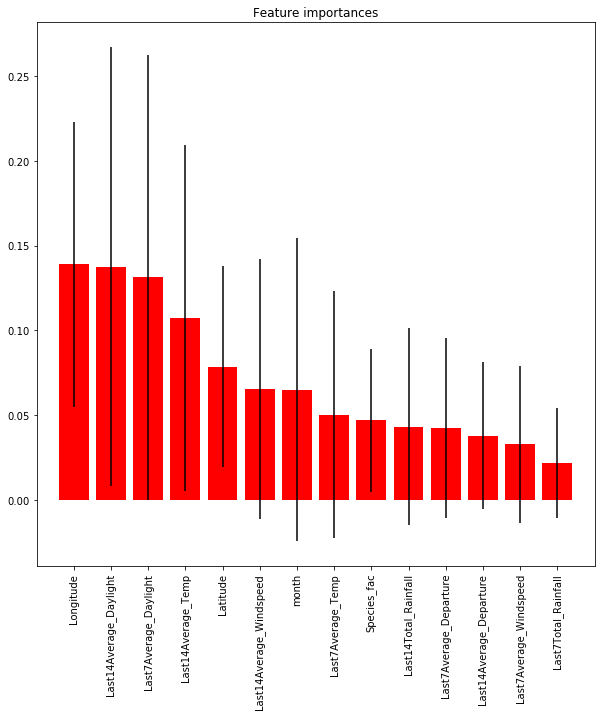

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

all(rfc.feature_importances_ == np.mean([tree.feature_importances_ for tree in rfc.estimators_], axis=0))

importances = rfc.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [19]:
#for submission:

In [27]:
test_model_II = pd.read_csv('test_model_2.0.csv')

In [28]:
submission_TS_2 = pd.DataFrame(test_model_II['Id'], index=None)

In [29]:
test_ = test_model_II.drop('Id', 1)

In [30]:
predictions = rfc.predict_proba(test_)[:,1]

In [31]:
submission_TS_2['WnvPresent'] = predictions

In [34]:
submission_TS_2.to_csv('submission_TS_2.csv', index=False)

In [1]:
#submission = pd.DataFrame(df_test_II['Id'], index=None)
#test_ = df_test_II.drop('Id', 1)
#predictions = xgbc.predict_proba(test_)[:,1]
#submission['WnvPresent'] = predictions
#submission.to_csv('submission.csv', index=False)

In [ ]:
#trying out SVM model:

In [36]:
def do_cv(model, X, y, cv):
    score = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print model
    mean = score.mean()
    std = score.std()
    print 'Average score = ', mean, '+/-', std
    return

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler=StandardScaler()

#Fit and Transform X_data
Normalized_X = scaler.fit(X).transform(X)

In [39]:
cv = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=41)

In [41]:
from sklearn import svm, linear_model
from sklearn.cross_validation import cross_val_score
model = svm.SVC(kernel='rbf')
do_cv(model, Normalized_X, y, cv)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Average score =  0.757539723185 +/- 0.0162376764713


In [42]:
def do_cm_cr(model, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
    model = model.fit(X_train, y_train)
    predict = model.predict(X_test)
    cm = confusion_matrix(y_test, predict)
    report = classification_report(y_test, predict, target_names = names)
    print cm
    print report   
    return

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = svm.SVC(kernel='rbf')
labels = ['No WNV', 'WNV']
do_cm_cr(model, Normalized_X, y, labels )

[[3285    0]
 [ 182    0]]
             precision    recall  f1-score   support

     No WNV       0.95      1.00      0.97      3285
        WNV       0.00      0.00      0.00       182

avg / total       0.90      0.95      0.92      3467



/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
import pandas as pd
infection_rates = pd.read_csv('infection_rates.csv')

In [2]:
infection_rates.head()

,Date,NumMosquitos,WNV_mosquitos,rate
0,2007-05-29,40,0,0.0
1,2007-06-05,127,0,0.0
2,2007-06-26,216,0,0.0
3,2007-06-29,85,0,0.0
4,2007-07-02,240,0,0.0


In [8]:
infection_rates.groupby('Date')

In [10]:
print infection_rates.groupby('Date')

In [11]:
df = infection_rates.groupby('Date')

In [14]:
df.head()


,Date,NumMosquitos,WNV_mosquitos,rate
0,2007-05-29,40,0,0.000000
1,2007-06-05,127,0,0.000000
2,2007-06-26,216,0,0.000000
3,2007-06-29,85,0,0.000000
4,2007-07-02,240,0,0.000000
5,2007-07-11,1103,0,0.000000
6,2007-07-18,853,50,0.058617
7,2007-07-19,687,0,0.000000
8,2007-07-25,4069,250,0.061440
9,2007-07-27,247,0,0.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
infection_rates.dtypes

Date             datetime64[ns]
NumMosquitos              int64
WNV_mosquitos             int64
rate                    float64
year                      int64
dtype: object

In [26]:
infection_rates['Date'] = pd.to_datetime(infection_rates.Date)

In [27]:
infection_rates['year'] = infection_rates['Date'].dt.year

In [28]:
infection_rates.head()

,Date,NumMosquitos,WNV_mosquitos,rate,year
0,2007-05-29,40,0,0.0,2007
1,2007-06-05,127,0,0.0,2007
2,2007-06-26,216,0,0.0,2007
3,2007-06-29,85,0,0.0,2007
4,2007-07-02,240,0,0.0,2007


In [29]:
rate_2011 = infection_rates[infection_rates.year == 2011]

In [30]:
rate_2011.head()

,Date,NumMosquitos,WNV_mosquitos,rate,year
59,2011-06-10,429,0,0.0,2011
60,2011-06-17,830,0,0.0,2011
61,2011-06-24,846,0,0.0,2011
62,2011-06-30,1944,0,0.0,2011
63,2011-07-11,2091,0,0.0,2011


In [31]:
x = rate_2011['rate']

In [32]:
y = rate_2011['Date']